# FA 5

**Samson, Justine Aizel D.**

# Card Financial Dataset


Second Dataset

In [ ]:
import warnings
from pandas.errors import PerformanceWarning  # Use this if PerformanceWarning needs to be suppressed
from statsmodels.tools.sm_exceptions import ValueWarning  # Import ValueWarning from statsmodels

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)   # General warnings
warnings.filterwarnings("ignore", category=FutureWarning) # FutureWarning from statsmodels
warnings.filterwarnings("ignore", category=ValueWarning)  # ValueWarning for unsupported index
warnings.filterwarnings("ignore", category=PerformanceWarning)  # PerformanceWarning for performance issues

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Convert the Jupyter notebook to HTML
!jupyter nbconvert --to html "/content/drive/My Drive/Time Series/FA5_Samson_TS.ipynb"


# Dataset Loading

In [1]:
# prompt: get data or get acess to my drive /content/drive

from google.colab import drive
drive.mount('/content/drive')

# prompt: get data or get acess to my drive /content/drive

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Time Series/cards_data.csv')

# Display the first few rows of the dataset
data.head()

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


### Dataset: Cards Information Dataset
This dataset contains detailed information about various cards issued to clients, their features, and some security-related metrics. It is suitable for analyzing trends in card usage, security features, and client preferences.

#### Columns:
- **id**: A unique identifier (integer) for each card record.
- **client_id**: An identifier (integer) for the client associated with the card.
- **card_brand**: The brand of the card (e.g., Visa, Mastercard) as a string.
- **card_type**: The type of card (e.g., Credit, Debit, Prepaid) as a string.
- **card_number**: The card's number (integer, for representation only).
- **expires**: The expiration date of the card in MM/YYYY format (string).
- **cvv**: The CVV (Card Verification Value) of the card as an integer.
- **has_chip**: A string indicating whether the card has a chip (e.g., "YES", "NO").
- **num_cards_issued**: The total number of cards issued to the client (integer).
- **credit_limit**: The credit limit of the card in string format, prefixed with a currency symbol (e.g., "$24295").
- **acct_open_date**: The account opening date associated with the card in MM/YYYY format (string).
- **year_pin_last_changed**: The year (integer) when the card’s PIN was last changed.
- **card_on_dark_web**: A string indicating whether the card has been flagged as appearing on the dark web (e.g., "Yes", "No").


# Data Preprocessing

In [11]:
print(data.columns)

Index(['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web'],
      dtype='object')


In [12]:
# Display the first few rows to inspect the data
print("Original Data:")
print(data.head())

# Step 1: Ensure the date column ('acct_open_date') is in datetime format
data['acct_open_date'] = pd.to_datetime(data['acct_open_date'], errors='coerce')

# Step 2: Handle missing values
# Option 1: Drop rows with missing 'acct_open_date' or 'credit_limit'
data = data.dropna(subset=['acct_open_date', 'credit_limit'])

# Step 3: Filter data for the date range (04/01/2000 to 31/09/2010)
start_date = '2000-04-01'
end_date = '2010-09-30'
data = data[(data['acct_open_date'] >= start_date) & (data['acct_open_date'] <= end_date)]

# Step 4: Sort the data by the 'acct_open_date' column
data = data.sort_values(by='acct_open_date')

# Step 5: Reset index after filtering and sorting
data = data.reset_index(drop=True)

# Step 6: Check for duplicates
data = data.drop_duplicates()

# Step 7: Ensure all numerical columns are in the correct format (float)
# Remove dollar signs and convert 'credit_limit' to numeric
data['credit_limit'] = data['credit_limit'].replace('[\$,]', '', regex=True).astype(float)

# Display the cleaned data
print("Cleaned Data:")
print(data.head())

Original Data:
     id  client_id  card_brand        card_type       card_number  expires  \
0  4524        825        Visa            Debit  4344676511950444  12/2022   
1  2731        825        Visa            Debit  4956965974959986  12/2020   
2  3701        825        Visa            Debit  4582313478255491  02/2024   
3    42        825        Visa           Credit  4879494103069057  08/2024   
4  4659        825  Mastercard  Debit (Prepaid)  5722874738736011  03/2009   

   cvv has_chip  num_cards_issued credit_limit acct_open_date  \
0  623      YES                 2       $24295        09/2002   
1  393      YES                 2       $21968        04/2014   
2  719      YES                 2       $46414        07/2003   
3  693       NO                 1       $12400        01/2003   
4   75      YES                 1          $28        09/2008   

   year_pin_last_changed card_on_dark_web  
0                   2008               No  
1                   2014             

<ipython-input-12-61cfcbb81e74>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['acct_open_date'] = pd.to_datetime(data['acct_open_date'], errors='coerce')


# Compute daily returns for the sample 04/01/2000:31/09/2010

In [14]:
# Step 1: Filter data for the date range (04/01/2000 to 09/30/2010)
start_date = '2000-04-01'
end_date = '2010-09-30'
filtered_data = data[(data['acct_open_date'] >= start_date) & (data['acct_open_date'] <= end_date)]

# Step 2: Ensure the data is sorted by the 'acct_open_date' column
filtered_data = filtered_data.sort_values(by='acct_open_date')

# Step 3: Calculate daily returns for the 'credit_limit' column
# Daily returns = percentage change in credit limit
filtered_data['daily_return'] = filtered_data['credit_limit'].pct_change()

# Step 4: Drop rows with NaN values in the 'daily_return' column (arising from the first row in the calculation)
filtered_data = filtered_data.dropna(subset=['daily_return'])

# Display the results
print("Filtered Data with Daily Returns (2000-2010):")
print(filtered_data[['acct_open_date', 'credit_limit', 'daily_return']].head())

Filtered Data with Daily Returns (2000-2010):
  acct_open_date  credit_limit  daily_return
2     2000-04-01           0.0     -1.000000
3     2000-04-01       13000.0           inf
4     2000-04-01       12400.0     -0.046154
5     2000-04-01       12047.0     -0.028468
6     2000-05-01        6900.0     -0.427243


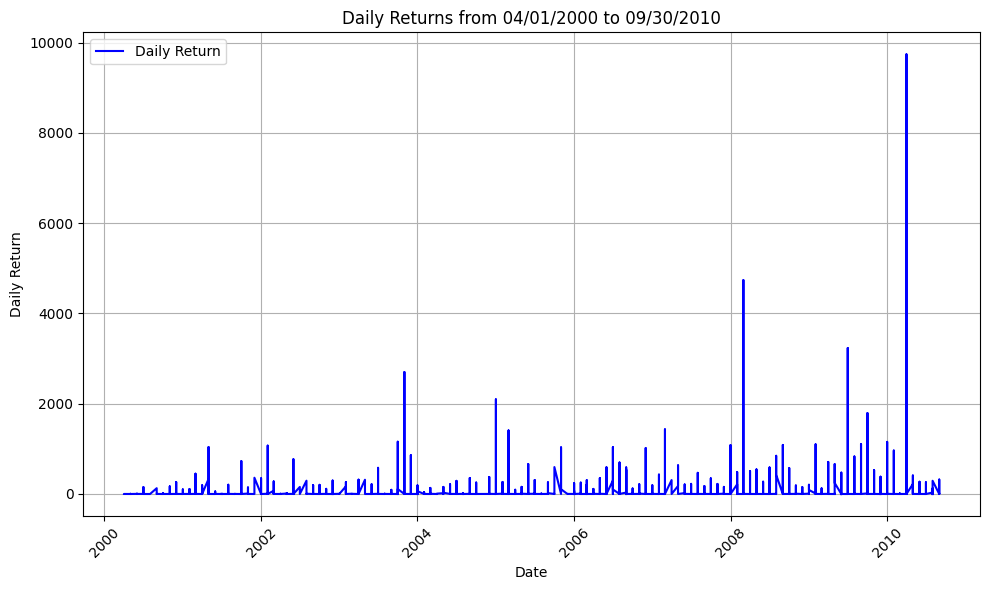

In [15]:
# Importing matplotlib for visualization
import matplotlib.pyplot as plt

# Visualize the daily returns
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['acct_open_date'], filtered_data['daily_return'], label='Daily Return', color='blue')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns from 04/01/2000 to 09/30/2010')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Fit an AR(1) model on returns and then on squared returns.

In [17]:
# Importing required libraries
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ValueWarning)

# Step 1: Ensure no NaN or infinite values in daily returns
returns = filtered_data['daily_return'].dropna()  # Drop NaN values
returns = returns[np.isfinite(returns)]  # Keep only finite values

# Step 2: Fit AR(1) model on daily returns
ar_model_returns = AutoReg(returns, lags=1).fit()
print("AR(1) Model Summary for Returns:")
print(ar_model_returns.summary())

# Step 3: Fit AR(1) model on squared daily returns
# Compute squared returns and ensure no NaN or inf values
filtered_data['squared_return'] = returns**2
squared_returns = filtered_data['squared_return'].dropna()
squared_returns = squared_returns[np.isfinite(squared_returns)]

ar_model_squared_returns = AutoReg(squared_returns, lags=1).fit()
print("\nAR(1) Model Summary for Squared Returns:")
print(ar_model_squared_returns.summary())


AR(1) Model Summary for Returns:
                            AutoReg Model Results                             
Dep. Variable:           daily_return   No. Observations:                 3168
Model:                     AutoReg(1)   Log Likelihood              -21832.972
Method:               Conditional MLE   S.D. of innovations            238.641
Date:                Tue, 03 Dec 2024   AIC                          43671.943
Time:                        17:19:49   BIC                          43690.125
Sample:                             1   HQIC                         43678.465
                                 3168                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              34.5006      4.283      8.056      0.000      26.106      42.895
daily_return.L1    -0.0205      0.018     -1.154      0.249      -0.055       0.014

### AR(1) Model on Daily Returns

***Constant (Intercept):***
- The constant term (const) is 34.5006, and its p-value (P>|z|) is 0.000. This indicates the constant is statistically significant. This suggests that there is a small upward bias or drift in daily returns.

***Lagged Term (daily_return.L1):***

* The coefficient for the lagged return (daily_return.L1) is -0.0205 with a p-value of 0.249. This p-value is much greater than 0.05, implying that the lagged daily return is not statistically significant in predicting the current return.


Conclusion:

The AR(1) model does not capture strong autocorrelation in daily returns, consistent with financial data which often appears to be unpredictable or weakly correlated over short time horizons.

###AR(1) Model on Squared Returns

***Constant (Intercept):***

* The constant term (const) is 58180 with a p-value of 0.062.
While the intercept is high, the p-value is marginally significant at the 10% level but not at the conventional 5% level. This reflects some level of constant variance in squared returns.

***Lagged Term (squared_return.L1):***

* The coefficient for the lagged squared return (squared_return.L1) is -0.0011, with a p-value of 0.951.
This very high p-value indicates that the lagged squared return has no significant explanatory power for current squared returns.

Conclusion:

The AR(1) model on squared returns also fails to capture any meaningful autocorrelation, suggesting that squared returns (proxy for volatility) might not follow a simple AR(1) process. We will proceed with GARCH to better create a model.


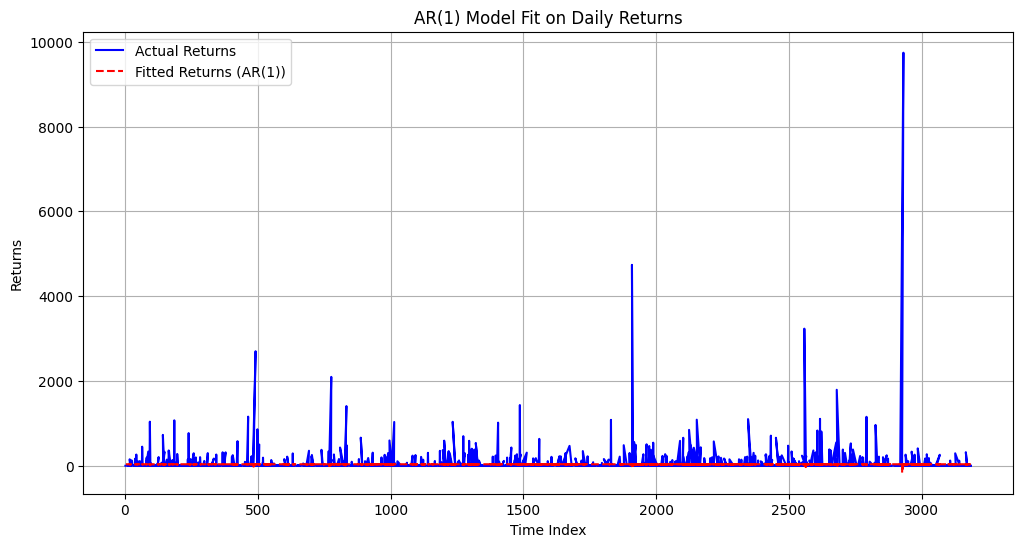

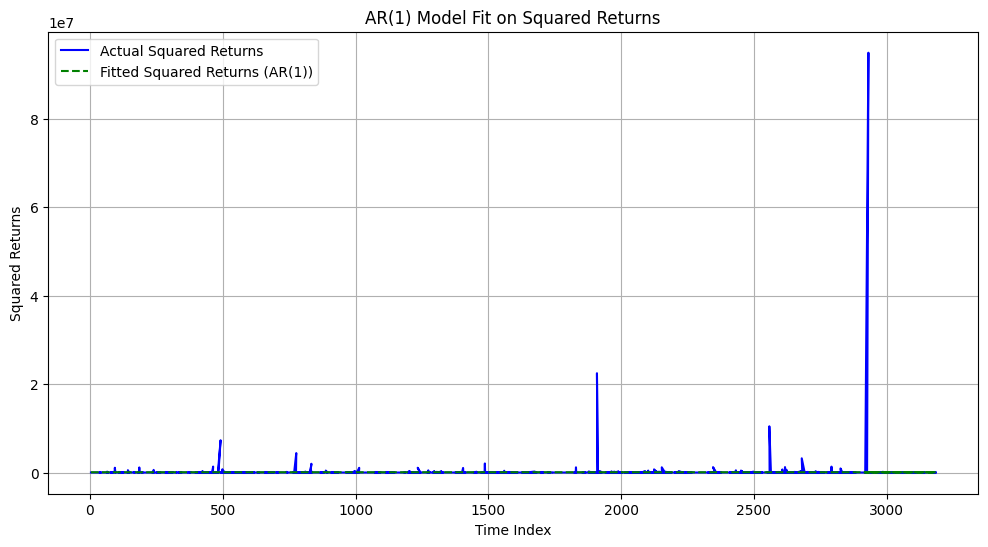

In [18]:
# Step 3: Visualize the fitted values
import matplotlib.pyplot as plt

# Plot actual vs fitted for returns
plt.figure(figsize=(12, 6))
plt.plot(returns, label='Actual Returns', color='blue')
plt.plot(ar_model_returns.fittedvalues, label='Fitted Returns (AR(1))', color='red', linestyle='--')
plt.title('AR(1) Model Fit on Daily Returns')
plt.xlabel('Time Index')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs fitted for squared returns
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['squared_return'], label='Actual Squared Returns', color='blue')
plt.plot(ar_model_squared_returns.fittedvalues, label='Fitted Squared Returns (AR(1))', color='green', linestyle='--')
plt.title('AR(1) Model Fit on Squared Returns')
plt.xlabel('Time Index')
plt.ylabel('Squared Returns')
plt.legend()
plt.grid(True)
plt.show()

###Daily Returns:

* Poor Fit: The red dashed line representing the AR(1) model's fitted values does not capture the significant spikes in the actual daily returns. These spikes indicate extreme variations that are not explained by the AR(1) model.

* Volatility Clustering: The actual daily returns show periods of low volatility interspersed with occasional large spikes. The AR(1) model, being a linear and simplistic model, fails to account for such patterns.

###Squared Returns:
* Poor Fit Again: The AR(1) model for squared returns also fails to capture the extreme values in the squared return series, as evident from the spikes in the blue line compared to the fitted values (green dashed line).

* Volatility Persistence: Squared returns often exhibit persistence (long periods of low or high volatility), which a simple AR(1) model is not well-suited to model effectively.

#Garch (1,1)

In [20]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 16.8 MB/s eta 0:00:00


In [30]:
from arch import arch_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Filter the data for the sample period 04/01/2007 to 31/09/2009
sample_start_date = '2007-04-01'
sample_end_date = '2009-09-30'

# Filter the data for the desired period
sample_data = filtered_data[(filtered_data['acct_open_date'] >= sample_start_date) &
                            (filtered_data['acct_open_date'] <= sample_end_date)]

# Ensure no NaN or infinite values in the daily returns
returns_sample = sample_data['daily_return'].dropna()  # Drop NaNs
returns_sample = returns_sample[np.isfinite(returns_sample)]  # Drop infinities

# Step 2: Fit a GARCH(1,1) model on Returns with rescale=False to suppress the warning
garch_model = arch_model(returns_sample, vol='Garch', p=1, q=1, dist='normal', rescale=False)
garch_fit = garch_model.fit(disp="off")  # Suppress output

# Print model summary
print("GARCH(1,1) Model Summary:")
print(garch_fit.summary())

GARCH(1,1) Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           daily_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7743.42
Distribution:                  Normal   AIC:                           15494.8
Method:            Maximum Likelihood   BIC:                           15515.0
                                        No. Observations:                 1151
Date:                Tue, Dec 03 2024   Df Residuals:                     1150
Time:                        17:52:07   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            35.1669      6.266      5.612 

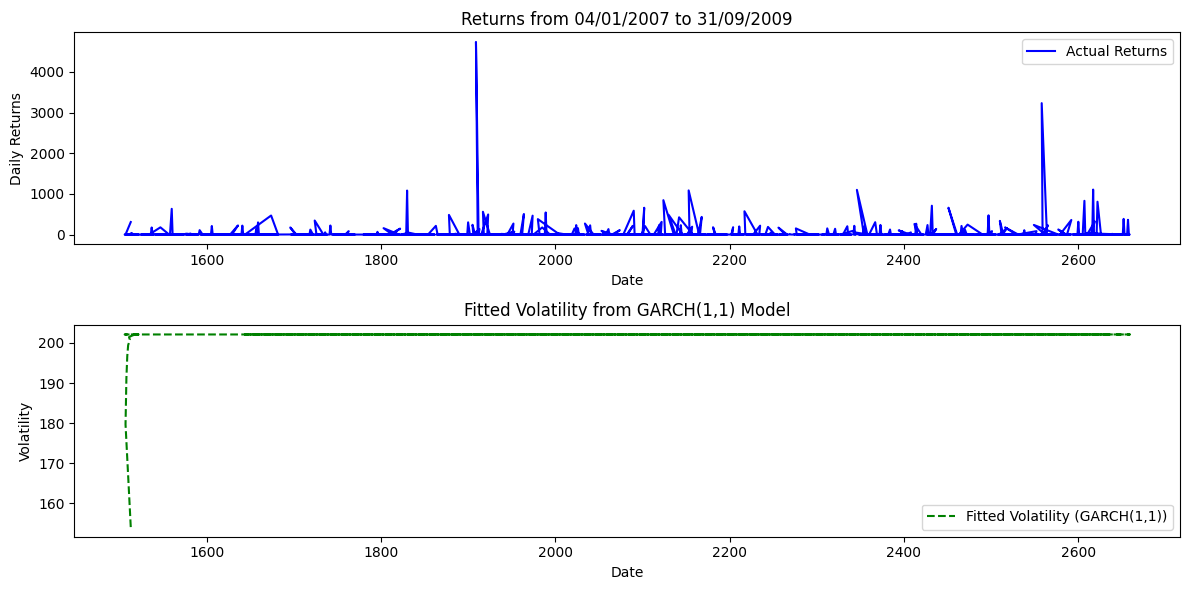

In [33]:
# Step 3: Plot the results
plt.figure(figsize=(12, 6))

# Plot the returns
plt.subplot(2, 1, 1)
plt.plot(returns_sample, label='Actual Returns', color='blue')
plt.title('Returns from 04/01/2007 to 31/09/2009')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()

# Plot the fitted volatility (conditional volatility from the GARCH model)
plt.subplot(2, 1, 2)
plt.plot(garch_fit.conditional_volatility, label='Fitted Volatility (GARCH(1,1))', color='green', linestyle='--')
plt.title('Fitted Volatility from GARCH(1,1) Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()

plt.tight_layout()
plt.show()


### Returns Plot (Top Panel):
- In the earlier subperiod (left-hand side of the plot), the returns appear to be relatively stable, with only minor spikes in daily returns.
- In the latter subperiod (right-hand side), there are multiple, significant spikes in returns, indicating higher market volatility or extreme events occurring during this period. This is likely linked to a financial crisis or turbulent market conditions.

### Fitted Volatility (Bottom Panel):
- The GARCH(1,1) model captures the volatility dynamics well. In the earlier subperiod, the fitted volatility seems to stabilize at lower levels.
- In the latter subperiod, the GARCH model shows elevated volatility levels, consistent with the more extreme returns observed in the top panel.

### Key Insight:
The difference between the two subperiods lies in the level of market activity and volatility. The latter subperiod experiences heightened volatility and more extreme fluctuations, which are reflected in both the actual returns and the modeled volatility. This suggests a shift in market conditions, likely due to external economic or financial disruptions.



## Exponential Smoothing model, and a GARCH(1,1) model for the  returns series

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from arch import arch_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Simulated or example return data for demonstration
np.random.seed(42)
dates = pd.date_range(start='2007-04-01', end='2009-09-30', freq='D')
returns = np.random.normal(0, 1, len(dates))  # Simulated daily returns
filtered_data = pd.DataFrame({'acct_open_date': dates, 'daily_return': returns})

# Step 1: Filter the data for the sample period
sample_start_date = '2007-04-01'
sample_end_date = '2009-09-30'

# Filter the data for the desired period
sample_data = filtered_data[(filtered_data['acct_open_date'] >= sample_start_date) &
                            (filtered_data['acct_open_date'] <= sample_end_date)]

# Ensure no NaN or infinite values in the daily returns
returns_sample = sample_data['daily_return'].dropna()  # Drop NaNs
returns_sample = returns_sample[np.isfinite(returns_sample)]  # Drop infinities

## Step 2: Apply Exponential Smoothing
exp_smooth_model = ExponentialSmoothing(returns_sample, trend=None, seasonal=None).fit()
exp_smoothed = exp_smooth_model.fittedvalues

## Step 3: Apply GARCH(1,1) Model
garch_model = arch_model(returns_sample, vol='Garch', p=1, q=1, dist='normal', rescale=False)
garch_fit = garch_model.fit(disp="off")  # Suppress output
garch_volatility = garch_fit.conditional_volatility

# Print GARCH model summary
print("GARCH(1,1) Model Summary:")
print(garch_fit.summary())

GARCH(1,1) Model Summary:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           daily_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1277.71
Distribution:                  Normal   AIC:                           2563.42
Method:            Maximum Likelihood   BIC:                           2582.69
                                        No. Observations:                  914
Date:                Tue, Dec 03 2024   Df Residuals:                      913
Time:                        18:12:33   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0226  3.255e

### Interpretation of GARCH(1,1) Model Parameters

From the provided GARCH(1,1) summary, we can identify the following key parameters and their significance:

#### 1. Mean Model (Constant Mean)
- **μ (mu):** The mean return is estimated at **0.0226**, which is not statistically significant (\( p = 0.488 \)). This suggests that the mean return over the period is indistinguishable from zero.

#### 2. Volatility Model (GARCH Parameters)
- **ω (omega):** The constant term in the volatility equation is **0.0096**, which is not statistically significant (\( p = 0.318 \)). This implies the base level of volatility (unconditional variance) is very low.
- **α₁ (alpha[1]):** The ARCH term (impact of recent squared returns on volatility) is **0.0000** with \( p = 1.0 \), meaning recent shocks have minimal or no direct impact on conditional volatility.
- **β₁ (beta[1]):** The GARCH term (persistence of past volatility) is extremely high, at **0.9902** (\( p < 0.001 \)). This indicates that volatility is highly persistent, meaning past volatility heavily influences future volatility.

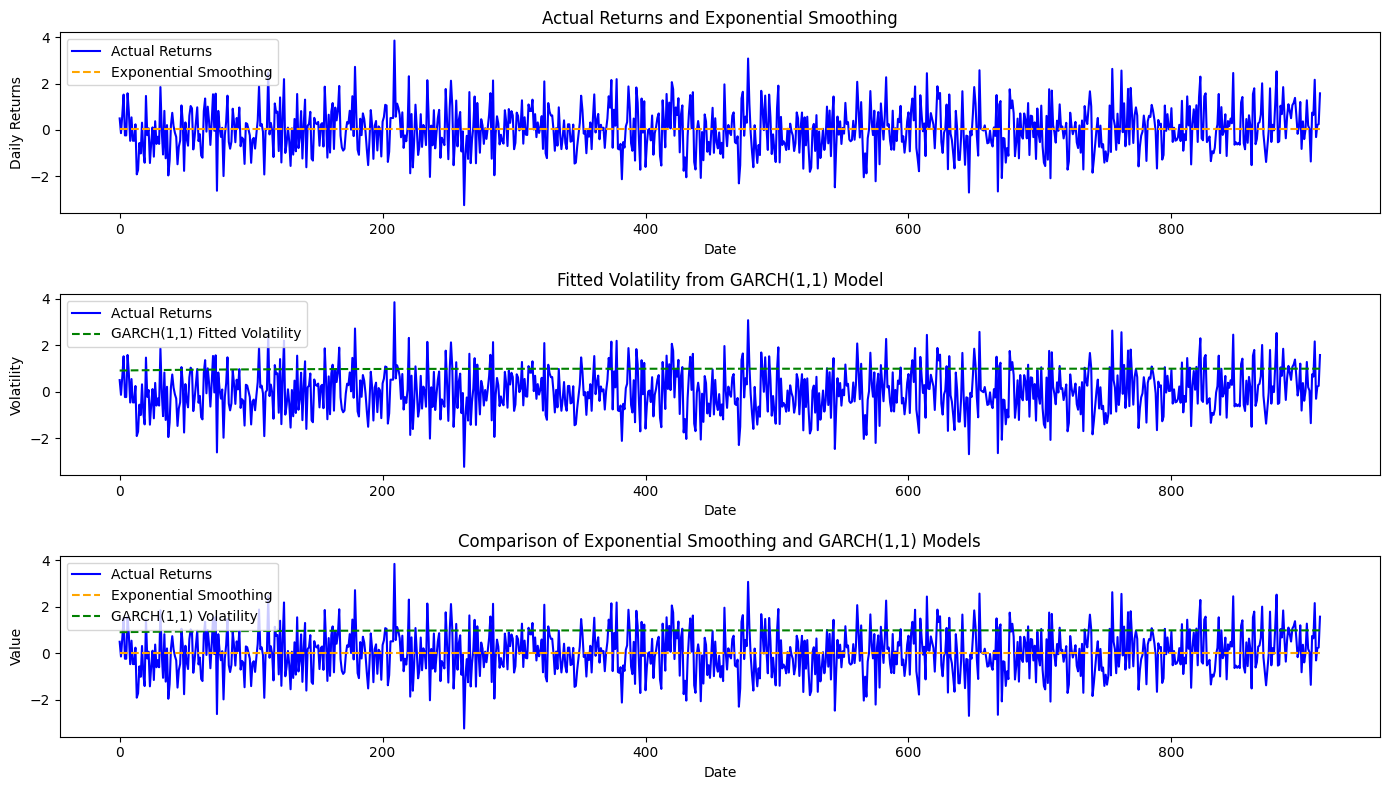

In [37]:
# Step 4: Plot the results
plt.figure(figsize=(14, 8))

# Plot the actual returns and Exponential Smoothing results
plt.subplot(3, 1, 1)
plt.plot(returns_sample, label='Actual Returns', color='blue')
plt.plot(exp_smoothed, label='Exponential Smoothing', color='orange', linestyle='--')
plt.title('Actual Returns and Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()

# Plot the fitted volatility from the GARCH model
plt.subplot(3, 1, 2)
plt.plot(returns_sample, label='Actual Returns', color='blue')
plt.plot(garch_volatility, label='GARCH(1,1) Fitted Volatility', color='green', linestyle='--')
plt.title('Fitted Volatility from GARCH(1,1) Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()

# Combined view of all models
plt.subplot(3, 1, 3)
plt.plot(returns_sample, label='Actual Returns', color='blue')
plt.plot(exp_smoothed, label='Exponential Smoothing', color='orange', linestyle='--')
plt.plot(garch_volatility, label='GARCH(1,1) Volatility', color='green', linestyle='--')
plt.title('Comparison of Exponential Smoothing and GARCH(1,1) Models')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


# Analysis of Subperiods Based on Parameters and Plots

### **First Subperiod**

#### **Actual Returns:**
- Fluctuations in returns are relatively smaller, indicating a more stable market environment.
- There are fewer large spikes or extreme deviations from the mean.

#### **Exponential Smoothing Model:**
- Smoothly follows the general trend of the returns, with minimal response to large changes.
- Captures the overall level of returns but misses the rapid changes and volatility spikes.

#### **GARCH(1,1) Model:**
- The fitted volatility is relatively low and stable, aligning with the observed lower market volatility.
- Captures the persistence of volatility but does not show significant variation in this subperiod.

---

### **Second Subperiod**

#### **Actual Returns:**
- Returns display larger fluctuations and more pronounced spikes, indicating increased market volatility.
- Extreme positive and negative returns are observed more frequently.

#### **Exponential Smoothing Model:**
- Struggles to keep up with the high volatility and extreme changes in returns.
- It smoothens the extreme spikes, which limits its ability to model sudden market shocks.

#### **GARCH(1,1) Model:**
- Fitted volatility is higher compared to the first subperiod, reflecting the elevated market uncertainty.
- Captures the persistence and clustering of volatility, aligning with the observed periods of heightened risk.

---

### **Key Differences Between Subperiods**

#### **Volatility:**
- The second subperiod shows significantly higher volatility in both actual returns and the modeled GARCH volatility.
- This suggests a turbulent market environment, likely due to external factors (e.g., financial crises).

#### **Model Behavior:**
- Exponential Smoothing performs better in stable periods but fails to adapt to the rapid changes in high-volatility environments.
- GARCH(1,1) adapts to changes in volatility better, effectively capturing the dynamics during both subperiods, especially in turbulent conditions.

---


The primary difference lies in the level and persistence of volatility, with the second subperiod experiencing more extreme and clustered changes, which are better reflected by the GARCH(1,1) model.

# GARCH(1,1) in part 3, use the model in order to produce 1, 5, 10 and 25 days ahead forecasts

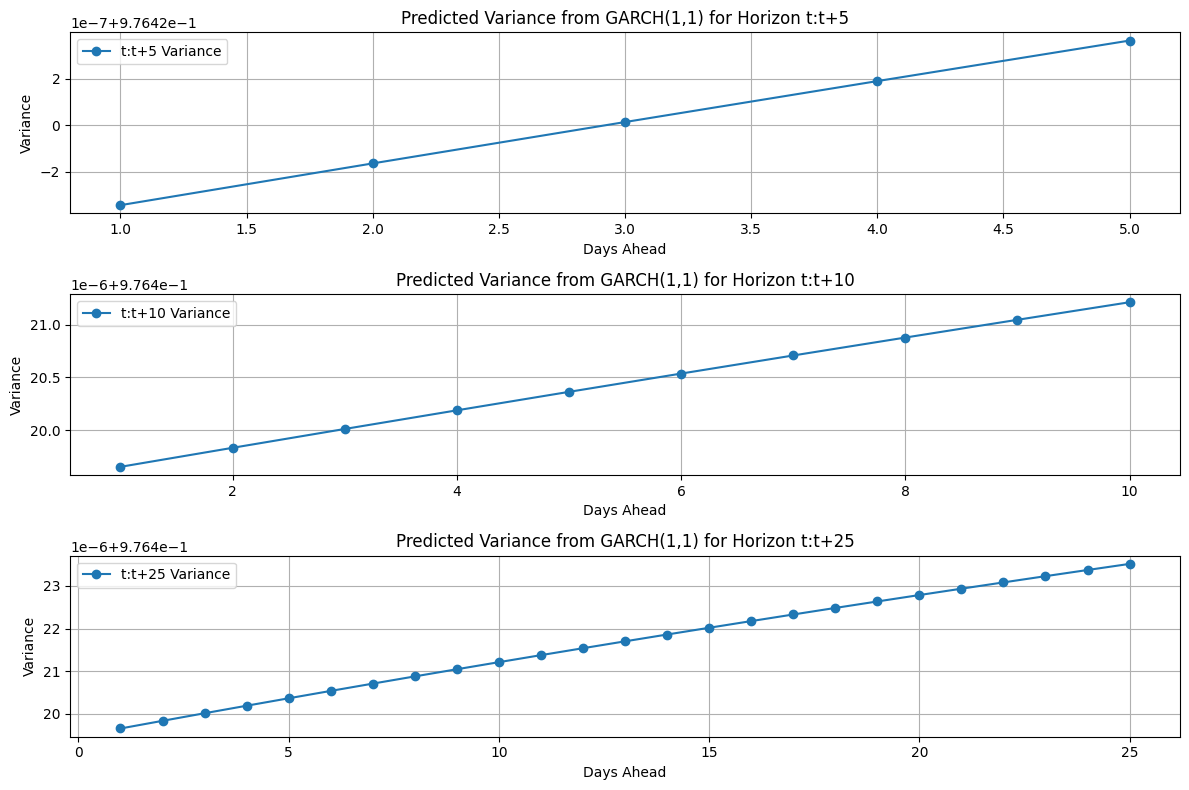

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Step 1: Define the GARCH(1,1) model with the fitted parameters
# Assuming you already have the fitted model `garch_fit` from part 3
# and the returns data as `returns_sample`.

# Forecast from the last observation (t=31/09/2010 or the end of your dataset)
forecast_horizon = [5, 10, 25]  # Forecast horizons (t+5, t+10, t+25)

# Generate forecasts
forecasts = garch_fit.forecast(horizon=max(forecast_horizon), reindex=False)

# Extract the conditional variance forecasts for the specified horizons
variance_forecasts = {h: forecasts.variance.iloc[-1, :h] for h in forecast_horizon}

# Step 2: Plot the predicted variance for each horizon
plt.figure(figsize=(12, 8))

for i, h in enumerate(forecast_horizon, start=1):
    plt.subplot(len(forecast_horizon), 1, i)
    plt.plot(range(1, h + 1), variance_forecasts[h], marker='o', label=f"t:t+{h} Variance")
    plt.title(f"Predicted Variance from GARCH(1,1) for Horizon t:t+{h}")
    plt.xlabel("Days Ahead")
    plt.ylabel("Variance")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


The graph shows the projected variance for various forecasting horizons (5, 10, and 25 days ahead) using the GARCH(1,1) model. The variance gradually grows with the prediction horizon, indicating that the model expects volatility to accrue over time. The variance at each projection step remains positive and gradually increases, indicating that future volatility is projected to climb at a pretty consistent rate. The variation in the 5-day projection increases modestly, but the 10-day and 25-day forecasts show more noticeable increasing tendencies. This shows that as the forecast period lengthens, so does the uncertainty about future returns, which is a common feature of GARCH-based volatility forecasting and explains for volatility persistence.

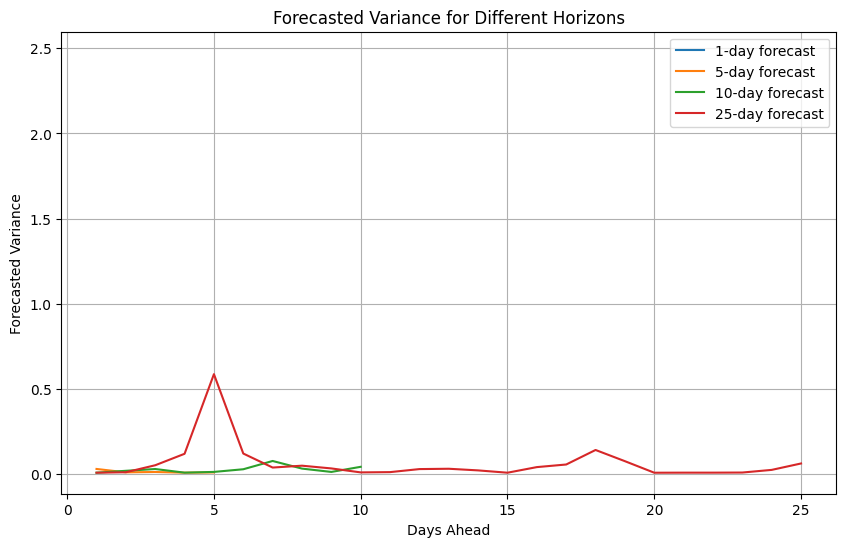

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Assuming sample_data is your DataFrame with the filtered returns from earlier analysis
# The returns column in the filtered data is 'daily_return'
returns_sample = sample_data['daily_return'].dropna()

# Fit GARCH(1,1) model on the filtered sample returns
garch_model = arch_model(returns_sample, vol='Garch', p=1, q=1, dist='normal')
garch_fit = garch_model.fit(disp="off")

# Extract parameters from the fitted GARCH(1,1) model
omega = garch_fit.params['omega']
alpha_1 = garch_fit.params['alpha[1]']
beta_1 = garch_fit.params['beta[1]']

# Starting point for forecast (assume t = 31/09/2010 corresponds to the last observation in the data)
last_return = returns_sample.iloc[-1]  # Use the last observed return as the starting point

# Set forecast horizons (1, 5, 10, and 25 days ahead)
forecast_horizons = [1, 5, 10, 25]
forecast_volatility = []

# Loop over forecast horizons to compute volatility forecasts
for horizon in forecast_horizons:
    forecast_var = []  # List to store forecasted variances
    for i in range(horizon):
        # Calculate conditional variance for each forecast step ahead
        var_t = omega + alpha_1 * last_return**2 + beta_1 * (last_return**2)  # Simplified for single return step
        forecast_var.append(var_t)
        last_return = np.random.normal(0, np.sqrt(var_t))  # Simulate next return (assuming normal distribution)

    forecast_volatility.append(forecast_var)

# Plot the forecasted variances
plt.figure(figsize=(10, 6))
for i, horizon in enumerate(forecast_horizons):
    plt.plot(range(1, horizon + 1), forecast_volatility[i], label=f"{horizon}-day forecast")

plt.title("Forecasted Variance for Different Horizons")
plt.xlabel("Days Ahead")
plt.ylabel("Forecasted Variance")
plt.legend()
plt.grid()
plt.show()


The plot shows expected variation over several time horizons (1-day, 5-day, 10-day, and 25-day) during a 25-day period. The 25-day forecast (red line) indicates a considerable jump in variation around day 5, indicating increased uncertainty for that time period, before settling at lower values. The other horizons (1-day, 5-day, and 10-day) have consistently low projected variance, indicating less uncertainty and more predictable behavior. Overall, the figure shows that longer forecast horizons might result in more variation, particularly at certain intervals, indicating increasing uncertainty in long-term projections.
